#  特征工程-创建新特征的示例

In [1]:
import pandas as pd #导入Pandas
import numpy as np #导入NumPy
import matplotlib.pyplot as plt #导入绘图工具
plt.rcParams['font.family'] = ['SimHei'] #或者 ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('特征构建示意数据集.csv') #导入数据
df #显示数据

,X,Y
0,0.27,-0.16
1,-0.80,0.65
2,-0.46,-0.42
3,-0.69,0.34
4,-0.16,-0.12
...,...,...
195,0.78,0.85
196,0.19,-0.11
197,-0.34,0.31
198,-0.45,0.34


Text(0, 0.5, 'Y值')

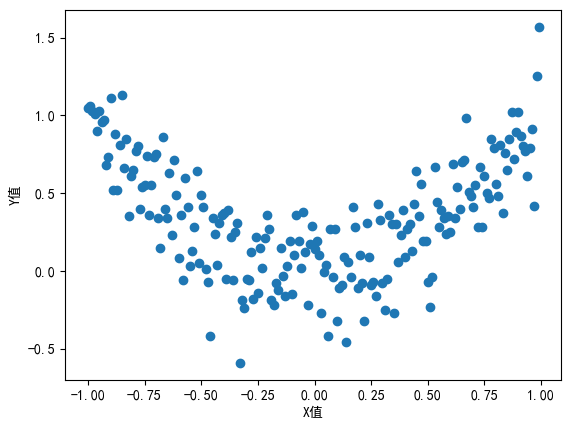

In [3]:
plt.scatter(df.X, df.Y) #X，Y散点图
plt.xlabel('X值') #x轴
plt.ylabel('Y值') #y轴

此代码段使用matplotlib库（缩写为plt）来绘制一个散点图，观察数据集（dataframe `df`）中两个特征（`X`和`Y`）之间的关系。以下是代码段的分步解释：

1. `plt.scatter(df.X, df.Y)`：绘制散点图，其中横坐标为数据集`df`的`X`列，纵坐标为数据集`df`的`Y`列。

2. `plt.xlabel('X值')`：为图形的x轴添加标签，名称为'X值'。

3. `plt.ylabel('Y值')`：为图形的y轴添加标签，名称为'Y值'。

在运行此代码段后，您将看到一个散点图，其中x轴表示特征X的值，y轴表示特征Y的值。通过观察散点图，您可以更好地理解这两个特征之间的关系（例如正相关、负相关或无关），从而为进一步的特征工程和模型构建提供依据。

In [4]:
from sklearn.model_selection import train_test_split #导入train_test_split 
df_x = df['X'].to_frame() #特征集
df_y = df['Y'] #标签集
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.3, random_state = 0) #拆分数据集

这段代码的目的是将数据集分为训练集和测试集，以便在机器学习模型中对数据进行训练和测试。以下是代码段的分步解释：

1. 导入`train_test_split`函数，用于分割数据集。
   ```python
   from sklearn.model_selection import train_test_split
   ```

2. 将`df['X']`列转换为DataFrame格式，将其作为特征集（`df_x`）。
   ```python
   df_x = df['X'].to_frame()
   ```

3. 将`df['Y']`列作为标签集（`df_y`）。这是我们希望机器学习模型根据提供的特征进行预测的目标变量。
   ```python
   df_y = df['Y']
   ```

4. 使用`train_test_split()`函数将特征集`df_x`和标签集`df_y`拆分为训练集和测试集。拆分比例为：70%的数据用于训练，30%的数据用于测试。`random_state`设置为0以保证每次运行时，数据集按照相同的方式进行拆分。
   ```python
   X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=0)
   ```

现在，您已经将数据集成功分为训练集（`X_train`和`y_train`）和测试集（`X_test`和`y_test`）。您可以使用训练集数据来训练机器学习模型，然后使用测试集数据来评估训练后的模型性能。这有助于您了解模型在未见过的数据上的预测能力。

# 使用线性回归模型

In [5]:
from sklearn.linear_model import LinearRegression #导入LinearRegression
model = LinearRegression() #创建模型
model.fit(X_train, y_train) #拟合模型

LinearRegression()

Text(0, 0.5, 'Y值')

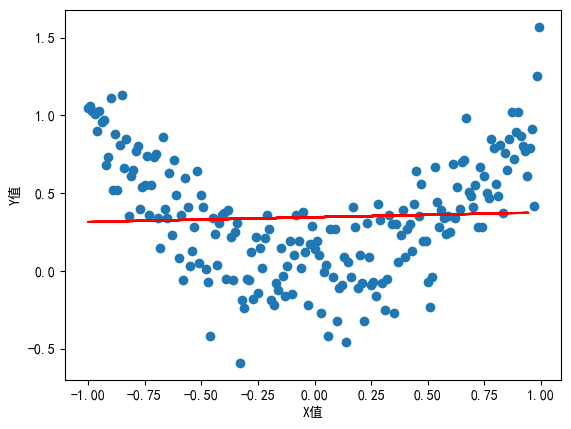

In [6]:
plt.scatter(df.X, df.Y) #散点图
plt.plot(X_test, model.predict(X_test),linestyle='--', color = 'red') #显示拟合曲线
plt.xlabel('X值') #x轴
plt.ylabel('Y值') #y轴

这段代码使用matplotlib库生成了一个散点图，显示了数据集中特征X与目标变量Y之间的关系。同时，在图上绘制了线性回归模型预测的数据点（拟合线），以便直观地观察模型如何拟合这些数据。以下是代码段的逐步解释：

1. 绘制原始数据集的散点图。`df.X`表示特征值，`df.Y`表示目标变量值。
   ```python
   plt.scatter(df.X, df.Y)
   ```

2. 在图上绘制线性回归模型拟合线。使用测试集的`X_test`数据作为输入，并用模型的`predict()`方法得到相应的预测值。线条样式设置为虚线，颜色设置为红色。
   ```python
   plt.plot(X_test, model.predict(X_test), linestyle='--', color='red')
   ```

3. 为图形设置x轴标签，表示为"X值"。
   ```python
   plt.xlabel('X值')
   ```

4. 为图形设置y轴标签，表示为"Y值"。
   ```python
   plt.ylabel('Y值')
   ```

执行这段代码后，您将看到一个散点图，其中包含数据集中的数据点以及线性回归模型的拟合线。通过观察拟合线与数据点的分布情况，您可以直观地了解模型在拟合这些数据方面的表现。

# 增加新特性

In [7]:
X2_train = X_train.copy() #新特征训练集
X2_test = X_test.copy() #新特征测试集

这段代码创建了原始训练集(`X_train`)和测试集(`X_test`)的副本，分别命名为`X2_train`和`X2_test`。在某些情况下，您可能需要对训练数据和测试数据进行额外的处理(如特征工程)或进行一些实验，这时，建立副本是非常有用的。这样，您可以保留原始数据，避免对原始数据的不必要修改。您可以对`X2_train`和`X2_test`进行修改，而不改变原始训练和测试数据。

以下是代码的逐步解释：

1. 创建训练数据集`X_train`的副本并命名为`X2_train`。
    ```python
    X2_train = X_train.copy()
    ```

2. 创建测试数据集`X_test`的副本并命名为`X2_test`。
    ```python
    X2_test = X_test.copy()
    ``` 

现在，您可以根据需要修改`X2_train`和`X2_test`数据集，而不会影响原始数据集。在进行任何数据处理时，始终保留原始数据是一个很好的做法。

In [8]:
X2_train['X2'] = X2_train['X']**2 #构建新特征X2
X2_train.head() #显示新特征训练集

,X,X2
131,0.21,0.0441
96,0.33,0.1089
181,-0.47,0.2209
19,0.13,0.0169
153,-0.52,0.2704


这段代码将原始特征`X`的平方作为新特征`X2`添加到副本训练数据集`X2_train`中。这是一个示例，如何在训练数据中构建新的特征，这样的特征工程有助于提高模型的性能。以下是代码的逐步解释：

1. 计算特征`X`的平方值（`X ** 2`）并将其作为新特征`X2`添加到数据集`X2_train`中。
   ```python
   X2_train['X2'] = X2_train['X']**2
   ```

2. 使用`head()`方法显示`X2_train`数据集的前几行，以便查看新特征`X2`是否已成功添加到数据集中。
   ```python
   X2_train.head()
   ```

在执行这段代码后，您将看到一个包含新特征`X2`的训练数据集。接下来，您可以使用这个包含新特征的数据集来训练和测试模型，以评估是否能提高模型性能。在实际应用中，特征工程通常包括从现有特征中提取新特征、组合特征、转换特征等，以帮助捕捉数据中的模式。

In [9]:
X2_test['X2'] = X2_test['X']**2 #构建新特征X2
# X2_test #显示新特征测试集

此段代码将原始特征`X`的平方作为新特征`X2`添加到副本测试数据集`X2_test`中。与`X_train`类似，这是一个构建新特征的示例，以此增强测试数据集。以下是代码的逐步解释：

1. 计算特征`X`的平方值（`X ** 2`），并将其作为新特征`X2`添加到数据集`X2_test`中。
   ```python
   X2_test['X2'] = X2_test['X']**2
   ```

直接运行这段代码后，新特征`X2`将被添加到测试数据集`X2_test`中。但是，请注意，这里没有显示包含新特征的测试集`X2_test`。如果您确实想查看这个包含新特征的测试数据集，只需取消对`X2_test`的注释（去掉行首的`#`），然后再执行此代码段：

```python
X2_test['X2'] = X2_test['X']**2 
X2_test
```

现在，您可以将包含新特征`X2`的训练集`X2_train`和测试集`X2_test`用于训练和评估模型，看看这个新特征是否能提高模型性能。在实际应用中，特征工程通常涉及提取新特征、组合特征、转换特征等，以帮助模型捕捉数据中的模式。

In [10]:
model2 = LinearRegression() #创建新模型
model2.fit(X2_train, y_train) #拟合新模型

LinearRegression()

这段代码创建了一个新的线性回归模型`model2`，并使用包含新特征`X2`的训练数据集`X2_train`来训练该模型。以下是代码的步骤说明：

1. 使用`LinearRegression()`函数创建一个新的线性回归模型实例，命名为`model2`。
   ```python
   model2 = LinearRegression()
   ```

2. 使用`fit()`方法，将`X2_train`(包含特征`X`和`X2`的训练数据)和相应的目标变量`y_train`(例如，模型的预测目标)作为输入，训练新的线性回归模型`model2`。
   ```python
   model2.fit(X2_train, y_train)
   ```

在运行这段代码后，新的线性回归模型`model2`现在已经训练好，并可以处理具有原始特征`X`和新特征`X2`的数据。接下来，您可以使用包含新特征的测试数据集`X2_test`对模型进行预测，然后评估模型的性能，看看添加新特征`X2`是否有助于提高模型的准确性。在机器学习中，模型的准确性是通过评估指标（如均方误差、平均绝对误差等）来衡量的。

Text(0, 0.5, 'Y值')

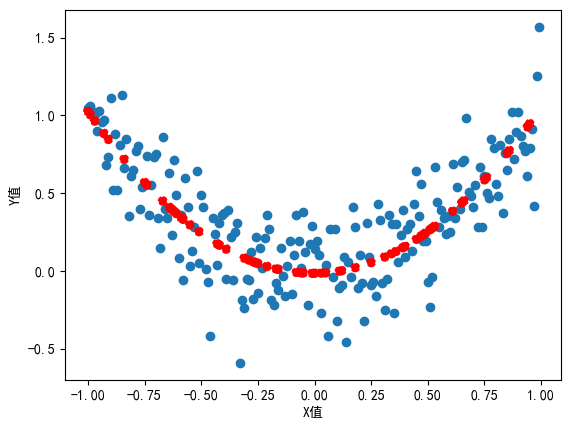

In [11]:
plt.scatter(df.X, df.Y) #散点图
# plt.plot(X_test, model.predict(X2_test),linestyle='--',color = 'red')
plt.scatter(X_test, model2.predict(X2_test), linestyle='--', color = 'red') #新拟合函数曲线
plt.xlabel('X值') #x轴
plt.ylabel('Y值') #y轴